In [31]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow


In [32]:
# Load the data from CSV files
landmarks_df = pd.read_csv('landmarks.csv', header=None)
point_history_df = pd.read_csv('point_history.csv', header=None)


In [33]:
# Inspect the first few rows of the data
print("Landmarks Data:")
print(landmarks_df.head())

print("\nPoint History Data:")
print(point_history_df.head())


Landmarks Data:
     0    1    2         3         4         5         6         7         8   \
0  Time  0.0  0.0 -0.113674 -0.044264 -0.216580 -0.126220 -0.248445 -0.196120   
1  Time  0.0  0.0 -0.114794 -0.043287 -0.214074 -0.123791 -0.246337 -0.193160   
2  Time  0.0  0.0 -0.114696 -0.039556 -0.213406 -0.114329 -0.247248 -0.183603   
3  Time  0.0  0.0 -0.123438 -0.051262 -0.224791 -0.130263 -0.271487 -0.208909   
4  Time  0.0  0.0 -0.116346 -0.047808 -0.215962 -0.129154 -0.256723 -0.202200   

         9   ...        75        76        77        78        79        80  \
0 -0.176292  ... -0.471061  0.850652 -0.831177  0.444402 -0.748317  0.565786   
1 -0.176992  ... -0.459641  0.901476 -0.809044  0.456671 -0.709299  0.585428   
2 -0.186922  ... -0.509290  0.909404 -0.798722  0.458317 -0.694875  0.607484   
3 -0.216370  ... -0.672983  0.777412 -0.792451  0.470704 -0.692611  0.674606   
4 -0.205062  ... -0.673209  0.752966 -0.785853  0.480925 -0.684251  0.691749   

         81     

In [34]:
# Extract labels and features from landmarks data
landmarks_labels = landmarks_df.iloc[:, 0].values
landmarks_features = landmarks_df.iloc[:, 1:].values

# Extract labels and features from point history data
point_history_labels = point_history_df.iloc[:, 0].values
point_history_features = point_history_df.iloc[:, 1:].values

# Ensure the labels are the same for both datasets
assert np.array_equal(landmarks_labels, point_history_labels), "Labels do not match between datasets."


In [35]:
# Encode labels into integers
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(landmarks_labels)

# Convert encoded labels to categorical
categorical_labels = tensorflow.keras.utils.to_categorical(encoded_labels)


In [36]:
# Split the data into training and test sets
X_landmarks_train, X_landmarks_test, X_point_history_train, X_point_history_test, y_train, y_test = train_test_split(
    landmarks_features, point_history_features, categorical_labels, test_size=0.2, random_state=42)


In [37]:
# Verify the shapes of the data
print("X_landmarks_train shape:", X_landmarks_train.shape)
print("X_landmarks_test shape:", X_landmarks_test.shape)
print("X_point_history_train shape:", X_point_history_train.shape)
print("X_point_history_test shape:", X_point_history_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_landmarks_train shape: (212, 84)
X_landmarks_test shape: (53, 84)
X_point_history_train shape: (212, 20)
X_point_history_test shape: (53, 20)
y_train shape: (212, 3)
y_test shape: (53, 3)


In [38]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
# Define the input layers
landmarks_input = Input(shape=(84,), name='landmarks_input')
point_history_input = Input(shape=(20,), name='point_history_input')

# Define the landmarks branch
x = Dense(64, activation='relu')(landmarks_input)
x = Dense(32, activation='relu')(x)

# Define the point history branch
y = Dense(32, activation='relu')(point_history_input)
y = Dense(16, activation='relu')(y)

# Concatenate the branches
combined = Concatenate()([x, y])

# Output layer
z = Dense(16, activation='relu')(combined)
output = Dense(3, activation='softmax')(z)

# Define the model
model = tf.keras.models.Model(inputs=[landmarks_input, point_history_input], outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ landmarks_input     │ (None, 84)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ point_history_input │ (None, 20)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 64)        │      5,440 │ landmarks_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 32)        │        672 │ point_history_in… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 32)        │      2,080 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 16)        │        528 │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 48)        │          0 │ dense_13[0][0],   │
│ (Concatenate)       │                   │            │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 16)        │        784 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 3)         │         51 │ dense_16[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 9,555 (37.32 KB)

 Trainable params: 9,555 (37.32 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    [X_landmarks_train, X_point_history_train], y_train,
    validation_data=([X_landmarks_test, X_point_history_test], y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]
)


Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.3624 - loss: 1.0718 - val_accuracy: 0.9057 - val_loss: 0.9121
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8723 - loss: 0.8777 - val_accuracy: 0.9245 - val_loss: 0.7592
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9210 - loss: 0.7386 - val_accuracy: 1.0000 - val_loss: 0.6544
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9392 - loss: 0.6147 - val_accuracy: 1.0000 - val_loss: 0.5504
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9697 - loss: 0.4969 - val_accuracy: 0.9811 - val_loss: 0.4454
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9265 - loss: 0.4293 - val_accuracy: 0.9623 - val_loss: 0.3573
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9366 - loss: 0.3502 - val_accuracy: 0.9623 - val_loss: 0.2818
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9744 - loss: 0.2626 - val_accuracy: 0.9623 - val_loss: 0.221

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0068 
Test Loss: 0.0056, Test Accuracy: 1.0000


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/stepWARNING:tensorflow:6 out of the last 8 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001BF5F564280> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


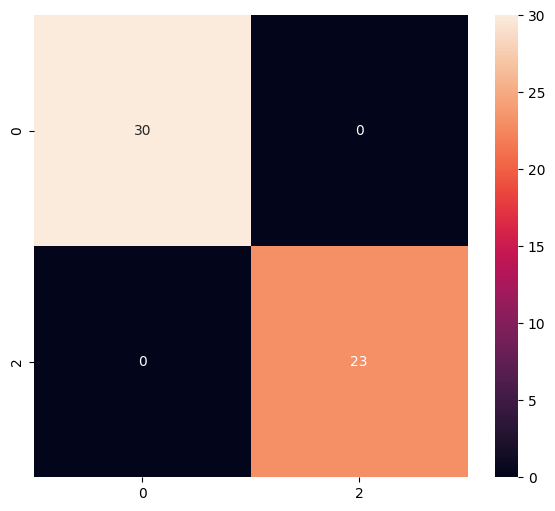

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        23

    accuracy                           1.00        53
   macro avg       1.00      1.00      1.00        53
weighted avg       1.00      1.00      1.00        53



In [41]:
loss, accuracy = model.evaluate([X_landmarks_test, X_point_history_test], y_test)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_true, y_pred))

Y_pred = model.predict([X_landmarks_test, X_point_history_test])
y_pred = np.argmax(Y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print_confusion_matrix(y_true, y_pred)


In [42]:
# Save the model
# Save as a model dedicated to inference
model.save("keypoint_classifier.hdf5", include_optimizer=False)


In [ ]:
# Convert the model to TensorFlow Lite format with quantization
tflite_save_path = 'hand_gesture_model.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

# Save the TensorFlow Lite model
with open(tflite_save_path, 'wb') as f:
    f.write(tflite_quantized_model)


INFO:tensorflow:Assets written to: C:\Users\sarpa\AppData\Local\Temp\tmp3o5w3lsw\assets


INFO:tensorflow:Assets written to: C:\Users\sarpa\AppData\Local\Temp\tmp3o5w3lsw\assets


In [30]:
# Inference test with TensorFlow Lite model
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

# Get input and output tensor details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Set the input tensors
interpreter.set_tensor(input_details[0]['index'], np.array([X_landmarks_test[0]]))
interpreter.set_tensor(input_details[1]['index'], np.array([X_point_history_test[0]]))

# Perform inference
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

# Print results
print("TFLite Model Results:", np.squeeze(tflite_results))
print("Predicted Class:", np.argmax(np.squeeze(tflite_results)))


NameError: name 'tflite_save_path' is not defined